<a href="https://colab.research.google.com/github/PramW/Python_Lab/blob/Week2/2802488361_Dimas_Pramatya_Wijaya_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gauss Seidel Method

In [2]:
import numpy as np
a = [[8, 3, -3],[-2,-8,5],[3, 5 , 10]]#diambil miring dari pojok kiri atas kebawah (8,-8,10)(8>3+3)
#find diagonal coefficients
diag = np.diag (np.abs(a))
#find row sum without diagonal
off_diag = np.sum(np.abs(a), axis = 1) - diag
if np.all(diag > off_diag):
  print('matrix is diagonally dominant')#diagonally dominant karena lebih besar semua
else:
  print('NOT diagonally dominant')

matrix is diagonally dominant


contoh kalau nggak dominant

In [3]:
import numpy as np
a = [[6, 3, -3],[-2,-8,5],[3, 5 , 10]]#diambil miring dari pojok kiri atas kebawah (6,-8,10)(6>3+3)
#find diagonal coefficients
diag = np.diag (np.abs(a))
#find row sum without diagonal
off_diag = np.sum(np.abs(a), axis = 1) - diag
if np.all(diag > off_diag):
  print('matrix is diagonally dominant')
else:
  print('NOT diagonally dominant')#not diagonally dominant karena 6 tidak lebih besar dari 3+3

NOT diagonally dominant


Gauss Seilder Solver

In [4]:
x1=5
x2=5
x3=5
epsilon = 0.001
converged = False
x_old = np.array([x1,x2,x3])

for k in range(1,50):
  x1 = (2 + 3*x2 - 1*x3) / (10)
  x2 = (1 - 1*x1 + 2*x3) / (4)
  x3 = (2 + 2*x1 + 1*x2) / (14)
  x_new = np.array([x1,x2,x3])
  dx = np.sqrt(np.dot(x_new - x_old, x_new - x_old))
  print(f"{k}, {x1:.4f},{x2:.4f},{x3:.4f}")
  if dx < epsilon:
    converged = True
    print('Algorithm Converged at Iteration %d' %k)
    break
  x_old = x_new

if not converged:
  print('not converege,increase the # of iterations')

1, 1.2000,2.4500,0.4893
2, 0.8861,0.2731,0.2889
3, 0.2530,0.3312,0.2027
4, 0.2791,0.2816,0.2028
5, 0.2642,0.2854,0.2010
6, 0.2655,0.2841,0.2011
7, 0.2651,0.2843,0.2010
Algorithm Converged at Iteration 7


use numpy.linalg.solve

In [5]:

import numpy as np
#Define matrix A and vector y
A = np.array([[4,3,-5],[-2,-4,5],[8,8,0]])
y = np.array([2,5,-3])
#solve for x
x = np.linalg.solve(A,y)
#print the solution
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


yang diberi invers

In [6]:
import numpy as np
#Define matrix A and vector y
A = np.array([[4,3,-5],[-2,-4,5],[8,8,0]])
y = np.array([2,5,-3])
#find the inverse of A
A_inv = np.linalg.inv(A)
#multiply the invers by y to get the solution
x = np.dot(A_inv,y)
#print the solution
print(x)


[ 2.20833333 -2.58333333 -0.18333333]


Matplotlib

In [7]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#generate x and y
x = np.linspace(0,1,101)
y =  1 + x + x * np.random.random(len(x))

#assemble matriks A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:,np.newaxis]

#direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.53676349]
 [0.99732942]]


<function matplotlib.pyplot.show(close=None, block=None)>

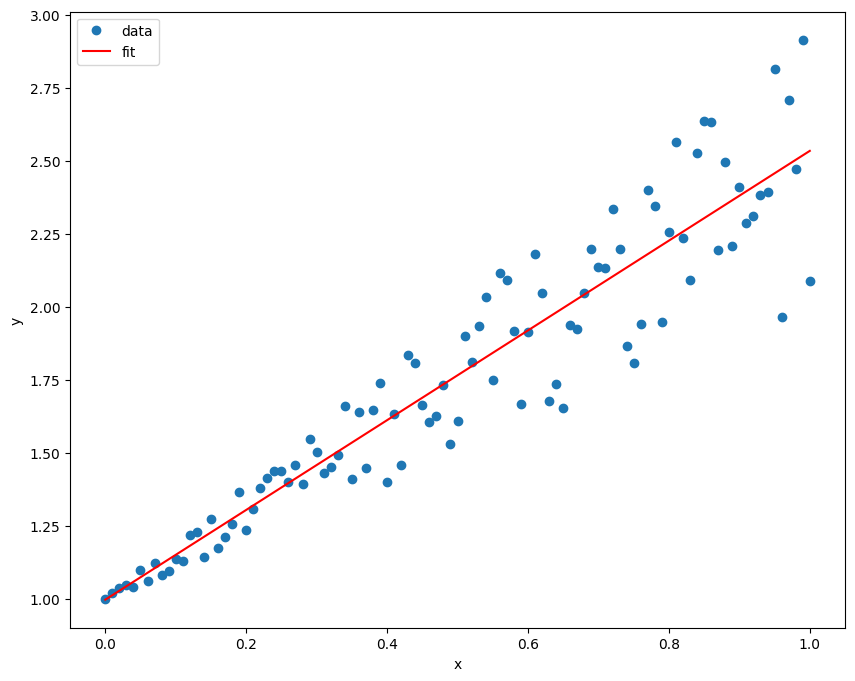

In [9]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'o', label = 'data')
plt.plot(x, alpha[0]*x + alpha [1], 'r',label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show

In [10]:
import numpy as np
#generate x and date points
x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

#assamble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

#calculate pseudoinverse
pinv = np.linalg.pinv(A)

#compute the solution
alpha = pinv.dot(y)

#print the coefficients
print(alpha)

[[1.5563227]
 [0.9753431]]


Tugas Modul 2

No 1

In [5]:
import numpy as np

def gauss_seidel(A, B, initial_guess, tol=0.001, max_iterations=100):
    n = len(B)
    x = np.array(initial_guess, dtype=float)
    x_new = np.copy(x)

    for _ in range(max_iterations):
        for i in range(n):
            sum1 = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (B[i] - sum1) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = np.copy(x_new)

    return x

# Persamaan pertama
A1 = np.array([[2, 3, -1], [1, -1, 2], [3, 2, 1]])
B1 = np.array([10, 4, 14])
initial_guess1 = [5, 5, 5]

result1 = gauss_seidel(A1, B1, initial_guess1)
print("Hasil Gauss-Seidel untuk sistem pertama:", result1)

# Bandingkan dengan metode numpy
print("Hasil menggunakan numpy:", np.linalg.solve(A1, B1))


Hasil Gauss-Seidel untuk sistem pertama: [-8.85379963e+93 -2.65613989e+94  7.96841967e+94]
Hasil menggunakan numpy: [0.65 4.15 3.75]


No 2

In [6]:
import numpy as np

def gauss_seidel(A, B, initial_guess, tol=0.001, max_iterations=100):
    n = len(B)
    x = np.array(initial_guess, dtype=float)
    x_new = np.copy(x)

    for _ in range(max_iterations):
        for i in range(n):
            sum1 = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (B[i] - sum1) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = np.copy(x_new)

    return x

# Persamaan kedua
A2 = np.array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]])
B2 = np.array([7.85, -19.3, 71.4])
initial_guess2 = [1, 2, 3]

result2 = gauss_seidel(A2, B2, initial_guess2)
print("Hasil Gauss-Seidel untuk sistem kedua:", result2)

# Bandingkan dengan metode numpy
print("Hasil menggunakan numpy:", np.linalg.solve(A2, B2))


Hasil Gauss-Seidel untuk sistem kedua: [ 3.00001426 -2.49999286  6.99999971]
Hasil menggunakan numpy: [ 3.  -2.5  7. ]


No 3

Persamaan regresi: y = 2.0000x + 0.0000


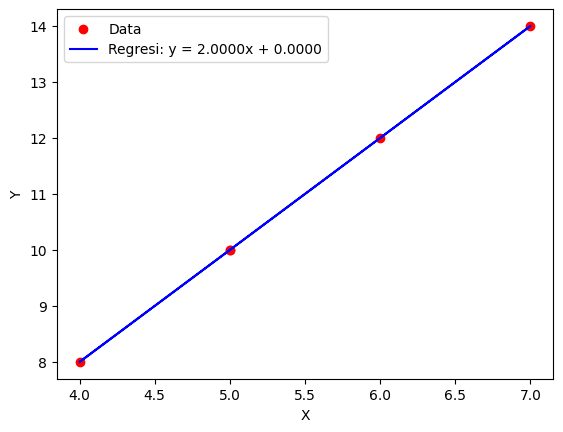

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares(X, Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    numerator = sum((X[i] - X_mean) * (Y[i] - Y_mean) for i in range(n))
    denominator = sum((X[i] - X_mean) ** 2 for i in range(n))
    a = numerator / denominator
    b = Y_mean - a * X_mean

    return a, b

# Data
X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])

# Perhitungan regresi
a, b = least_squares(X, Y)
print(f"Persamaan regresi: y = {a:.4f}x + {b:.4f}")

# Plot regresi
plt.scatter(X, Y, color='red', label='Data')
plt.plot(X, a*X + b, color='blue', label=f'Regresi: y = {a:.4f}x + {b:.4f}')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
